# Stabilities and accuracy in time. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from nm_lib import nm_lib as nm
from IPython.display import HTML
import importlib
importlib.reload(nm)

<module 'nm_lib.nm_lib' from '/home/astronih/Documents/nm_lib/nm_lib/nm_lib.py'>

Lets consider same setup as in [ex_3a](https://github.com/AST-Course/AST5110/blob/main/ex_3a.ipynb) Burgers’ equation, i.e.,

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0   \tag{1}$$ 

for the domain $x \in (x_0, x_f)$ with $x_0 = −1.4$, $x_f = 2.0$ with initial condition:

$$u(x,t=0) = A\left[\tanh\left(\frac{x+x_c}{W}\right)-\tanh\left(\frac{x-x_c}{W}\right)\right]   \tag{2}$$

whereby $A = 0.02$ , $x_c = 0.70$, $W = 0.1$. Let the solution evolve until time $t_f = 100$. Explain in physical (or mathematical) terms the solution you get. However, let's now implement a new time-step method. 

Add the following method to your library and run the previous simulation. 

$$u^{n+1}_j = \frac{1}{2}(u^n_{j+1} + u^n_{j-1}) - \frac{v \Delta t}{2 \Delta x}(u^n_{j+1} - u^n_{j-1})$$

Apply von Neumann stability analysis to the expression above. The stability condition $|\xi(k)|^2 \leq 1$ leads to the famous Courant-Friedrichs-Lewy (CFL) stability. 

Add this to your library and solve the previous simulation imposing the CFL condition. For this exercise, fill in `nm_lib` the function `evolv_Lax_uadv_burgers`. 

$$
\begin{align}
    u_{j}^{n} &= \xi^{n} e^{ijk\Delta x}\\
    u_{j}^{n+1} &= \xi^{n+1} e^{ijk\Delta x}\\
    u_{j+1}^n &= \xi^{n} e^{i(j+1)k\Delta x} \\
    u_{j-1}^n &= \xi^{n} e^{i(j-1)k\Delta x} \\
\end{align}
$$

Simplify with $\frac{v\Delta t}{\Delta x}=\chi$
$$
\begin{align}
    \xi^{n+1}e^{ijk\Delta x}  &= \frac{1}{2}\xi^{n}e^{ijk\Delta x} \left(e^{ik\Delta x} + e^{-ik\Delta x} - \chi e^{ik\Delta x} + \chi e^{-ik\Delta x} \right)\\
    \xi &= \frac{1}{2}\left(\left(\cos(k\Delta x) + i\sin(k\Delta x) \right)\left(1 - \chi\right) + \left(\cos(k\Delta x) - i\sin(k\Delta x)\right) \left(1+\chi\right) \right)\\
    \xi &= \cos(k\Delta x) - i\chi\sin(k\Delta x)\\
    \xi^* &= \cos(k\Delta x) + i\chi\sin(k\Delta x)
\end{align}
$$

$$
\begin{align}
|\xi| &= \xi \times \xi^*\\
|\xi| &= \cos^2(k\Delta x) + \chi^2\sin^2(k\Delta x)\\
&\Downarrow\nonumber\\
\cos^2(k\Delta x) &\leq 1 - \left(\frac{v\Delta t}{\Delta x}\right)^2\sin^2(k\Delta x)\\
-\sin^2(k\Delta x) &\leq - \left(\frac{v\Delta t}{\Delta x}\right)^2\sin^2(k\Delta x)\\
\sin(k\Delta x) &\geq \frac{v\Delta t}{\Delta x} \sin(k\Delta x)
\end{align}
$$

#### The fraction $\frac{v \Delta t}{\Delta x}$ needs to be less then 1 to gain stability which is going to be our `cfl_cut`

In [31]:
def u_init(xx, A=0.02, xc=0.7, W=0.1):
    ans = A*(np.tanh((xx + xc)/W) - np.tanh((xx - xc)/W))
    return ans
    
def u(xx, t, a):
    X = (xx - a*t)
    L = xx[-1] - xx[0]
    new_X = (X + L/2)%L - L/2
    return u_init(new_X)

x0 = -1.4
xf = 2.0
nump = 257

xx = np.arange(nump)/(nump - 1) * (xf - x0) + x0

In [42]:
hh = u_init(xx)
nt = 300
t, un_lax = nm.evolv_Lax_uadv_burgers(xx, hh, nt, 
            ddx=lambda x, y: nm.deriv_cent(x, y), bnd_limits=[1, 0])
t_up, ut_up = nm.evolv_uadv_burgers(xx, hh, nt, ddx=lambda x, y: nm.deriv_upw(x, y), bnd_limits=[0, 1])
print(np.shape(U))
print(np.shape(unnt[:,0]))

(257, 300)
(257,)


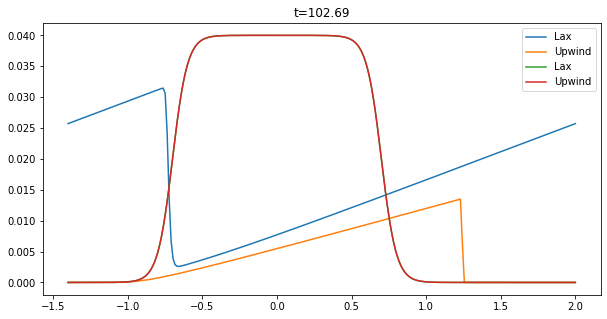

In [45]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

anim = nm.animation(xx, un_lax, ut_up, nt, t, label_1="Lax", label_2="Upwind")
HTML(anim.to_jshtml())

## 1- Diffusive. 

Redo the exercise [ex_2b](https://github.com/AST-Course/AST5110/blob/main/ex_2b.ipynb) and compare the two methods, i.e., one from 
[ex_2b](https://github.com/AST-Course/AST5110/blob/main/ex_2b.ipynb) and the Lax-Method. 

Which one is more diffusive? Why? Rewrite Lax-method, so the right-hand side is as follows: 

$$\frac{u^{n+1}-u^{n}}{\Delta t} = ...$$

What is the reminder term look like? Is the order of convergence the same for the two methods? 

$$
\begin{align}
u^{n+1}_j - u^{n}_j &= \frac{1}{2}\left(u^n_{j+1} + u^n_{j-1}\right) - \frac{v \Delta t}{2 \Delta x}\left(u^n_{j+1} - u^n_{j-1}\right) - u^n_j\\
\frac{u^{n+1}_j - u^n_j}{\Delta t} &= \frac{1}{2\Delta t}\left( u^n_{j+1} - 2u^n_j + u^n_j\right) - \frac{v}{2\Delta x}\left(u^n_{j+1} - u^n_{j-1}\right)
\end{align}
$$


#### The second term looks like the derivative centre scheme, with $a=v$

---

(\*) Equation (1) is, in fact, a shortened version of the full Burgers’ equation, which contains a viscosity term on the right-hand side, as follows:
$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}.$$